In [86]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
#Creating a dataframe for titanic
titanic_df = pd.read_csv('train.csv')

In [88]:
#Fixing datatypes
for i in titanic_df.columns:
    if i == 'Sex' or i == 'Embarked':
        titanic_df[i] = titanic_df[i].astype('category')
cat_columns =titanic_df.select_dtypes(['category']).columns
cat_columns = pd.get_dummies(titanic_df[cat_columns], drop_first=False)

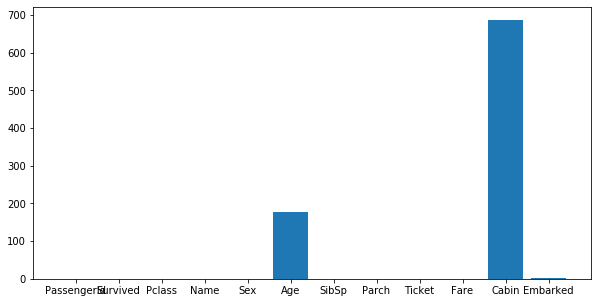

In [91]:
#Listing columns of the dataframe
titanic_df.columns

#Creating a bar chart of null values
x = titanic_df.isnull().sum().index
y = titanic_df.isnull().sum().values
plt.figure(figsize=(10,5))
plt.bar(x,y);

In [92]:
#Answering questions on Null Values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Which column has the most NaN values? How many cells in that column are empty?

Cabin is the column with most null values. 687 columns are empty

In [93]:
#Answering questions on Null Values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Which column has the most NaN values? How many cells in that column are empty?

Cabin is the column with most null values. 687 columns are empty

In [94]:
#Deleting all rows where Embarked is empty
titanic_df['Embarked'] = titanic_df['Embarked'].dropna

In [95]:
#Fill all empty cabins with ¯\(ツ)/¯
titanic_df['Age'] = titanic_df['Age'].fillna('¯\(ツ)/¯')
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('¯\(ツ)/¯')

In [96]:
#Creating a new column 'Family Count' Containing number of people 
#from the family present in the ship
titanic_df['FamilyCount'] = titanic_df['SibSp'] + titanic_df['Parch']

In [97]:
#Merging categorical columns
titanic_df = pd.merge(titanic_df, cat_columns, left_index=True, right_index=True)

In [98]:
#Creating a special categorical column to identify whether a person is a reverend or not
titanic_df['IsReverend'] = np.nan


In [99]:
#Finding Reverend's and their counts
counter = 0
sample_list = []
for i in titanic_df['Name']:
    if 'rev.' in i.lower():
        counter += 1
        sample_list.append(1)
        print (i)
    else:
        sample_list.append(0)
counter

Byles, Rev. Thomas Roussel Davids
Bateman, Rev. Robert James
Carter, Rev. Ernest Courtenay
Kirkland, Rev. Charles Leonard
Harper, Rev. John
Montvila, Rev. Juozas


6

In [100]:
#Populating the IS Reverend column
titanic_df['IsReverend'] = sample_list

In [101]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCount',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'IsReverend'],
      dtype='object')

In [102]:
#Dropping columns which have already been converted into categorical variables
titanic_df = titanic_df.drop(["Sex","Embarked"], axis=1)

In [103]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,1,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,1,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,1,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,¯\(ツ)/¯,0,0,1,0,0,1,0


In [104]:
#Looking at the final dataframe
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Age            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
FamilyCount    891 non-null int64
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
IsReverend     891 non-null int64
dtypes: float64(1), int64(7), object(4), uint8(5)
memory usage: 88.0+ KB


### Exploratory Data Analysis

In [135]:
#What is the overall survival rate?
counts_survival = titanic_df['Survived'].value_counts()
#print(counts_survival)
n_survived = counts_survival.values[1]
total = len(titanic_df)
survival_rate = (n_survived/total)*100

print(f'The survival rate for Titanic was {round(survival_rate,2)} %')

The survival rate for Titanic was 38.38 %


In [265]:
#Which gender fared the worst? What was their survival rate?
survived_women = titanic_df[(titanic_df['Sex_female'] == 1) & (titanic_df['Survived'] == 1) ]
survived_men = titanic_df[(titanic_df['Sex_male'] == 1) & (titanic_df['Survived'] == 1) ]
total_women = len(titanic_df[(titanic_df['Sex_female'] == 1)])
total_men = len(titanic_df[(titanic_df['Sex_male'] == 1)])

survival_rate_men = (len(survived_men)/total_men)*100
survival_rate_women = (len(survived_women)/total_women)*100

print(f'There were {total_men} men on the titanic and {len(survived_men)} of them survived with a survival rate of {round(survival_rate_men,2)} %')
print(f'There were {total_women} females on the titanic and {len(survived_women)} of them survived with a survival rate of {round(survival_rate_women,2)} %')

if survival_rate_men < survival_rate_women:
    print('Women fared better than men!')
else:
    print('Men fared better than women!')

There were 577 men on the titanic and 109 of them survived with a survival rate of 18.89 %
There were 314 females on the titanic and 233 of them survived with a survival rate of 74.2 %
Women fared better than men!


In [134]:
#What was the survival rate for each Pclass?
counts_classes = titanic_df['Pclass'].value_counts()
#print (counts_classes)
counts_class3 = counts_classes.values[0]
counts_class1 = counts_classes.values[1]
counts_class2 = counts_classes.values[2]

survived_class1 = len(titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Survived'] == 1) ])
survived_class2 = len(titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Survived'] == 1) ])
survived_class3 = len(titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Survived'] == 1) ])

survival_rate_class1 = (survived_class1/counts_class1)*100
survival_rate_class2 = (survived_class2/counts_class2)*100
survival_rate_class3 = (survived_class3/counts_class3)*100

print(f'There were {counts_class1} class 1 passengers on the titanic and {survived_class1} of them survived with a survival rate of {round(survival_rate_class1,2)} %')
print(f'There were {counts_class2} class 2 passengers on the titanic and {survived_class2} of them survived with a survival rate of {round(survival_rate_class2,2)} %')
print(f'There were {counts_class3} class 3 passengers on the titanic and {survived_class3} of them survived with a survival rate of {round(survival_rate_class3,2)} %')

There were 216 class 1 passengers on the titanic and 136 of them survived with a survival rate of 62.96 %
There were 184 class 2 passengers on the titanic and 87 of them survived with a survival rate of 47.28 %
There were 491 class 3 passengers on the titanic and 119 of them survived with a survival rate of 24.24 %


In [139]:
#Did any reverends survive? How many?
survived_reverend = titanic_df[(titanic_df['IsReverend']==1)&(titanic_df['Survived'] == 1)]
if len(survived_reverend) == 0:
    print ('None of the reverends survived the Titanic wreck')
else:
    print(f'{len(survived_reverend)} reverends survived the Titanic wreck' )

None of the reverends survived the Titanic wreck


In [150]:
#Survival rate for cabins marked ¯\(ツ)/¯
count_emoji_cabins = len(titanic_df[titanic_df['Cabin']=='¯\(ツ)/¯'])
survived_emoji_cabins = len(titanic_df[(titanic_df['Cabin']=='¯\(ツ)/¯') & (titanic_df['Survived'] == 1)])
survival_rate_emoji = (survived_emoji_cabins/count_emoji_cabins)*100

print(f'The survival rate for cabins marked ¯\(ツ)/¯ was {round(survival_rate_emoji,2)} %')

The survival rate for cabins marked ¯\(ツ)/¯ was 29.99 %


In [152]:
#Survival rate for people with ages unknown
count_emoji_ages = len(titanic_df[titanic_df['Age']=='¯\(ツ)/¯'])
survived_emoji_ages = len(titanic_df[(titanic_df['Age']=='¯\(ツ)/¯') & (titanic_df['Survived'] == 1)])
survival_rate_ages = (survived_emoji_ages/count_emoji_ages)*100
print(f'The survival rate for people with unknown ages was {round(survival_rate_ages,2)} %')

The survival rate for people with unknown ages was 29.38 %


In [171]:
#Survival rate for children (under 12) in each Pclass

#Creating a new dataframe to avoid character type errors while counting elements
titanic_df1 = titanic_df
titanic_df1['Age'] = titanic_df1['Age'].replace('¯\(ツ)/¯', 10000000)

count_under12_class1 = len(titanic_df1[(titanic_df1['Pclass'] == 1) & (titanic_df1['Age'] < 12)])
count_under12_class2 = len(titanic_df1[(titanic_df1['Pclass'] == 2) & (titanic_df1['Age'] < 12)])
count_under12_class3 = len(titanic_df1[(titanic_df1['Pclass'] == 3) & (titanic_df1['Age'] < 12)])


survived_under12_class1 = len(titanic_df1[(titanic_df1['Pclass'] == 1) & (titanic_df1['Age'] < 12) & (titanic_df1['Survived'] == 1)])
survived_under12_class2 = len(titanic_df1[(titanic_df1['Pclass'] == 2) & (titanic_df1['Age'] < 12) & (titanic_df1['Survived'] == 1)])
survived_under12_class3 = len(titanic_df1[(titanic_df1['Pclass'] == 3) & (titanic_df1['Age'] < 12) & (titanic_df1['Survived'] == 1)])

survival_rate_under12_class1 = (survived_under12_class1/count_under12_class1)*100
survival_rate_under12_class2 = (survived_under12_class2/count_under12_class2)*100
survival_rate_under12_class3 = (survived_under12_class3/count_under12_class3)*100

print(f'There were {count_under12_class1} class 1 children under 12 on the titanic and {survived_under12_class1} of them survived with a survival rate of {round(survival_rate_under12_class1,2)} %')
print(f'There were {count_under12_class2} class 1 children under 12 on the titanic and {survived_under12_class2} of them survived with a survival rate of {round(survival_rate_under12_class2,2)} %')
print(f'There were {count_under12_class3} class 1 children under 12 on the titanic and {survived_under12_class3} of them survived with a survival rate of {round(survival_rate_under12_class3,2)} %')

There were 34 class 1 children under 12 on the titanic and 17 of them survived with a survival rate of 50.0 %
There were 28 class 1 children under 12 on the titanic and 21 of them survived with a survival rate of 75.0 %
There were 183 class 1 children under 12 on the titanic and 53 of them survived with a survival rate of 28.96 %


In [176]:
#Did the captain of the ship survive? Is he on the list?
for i in titanic_df['Name']:
    if 'cap' in i.lower():
        print (i)

Crosby, Capt. Edward Gifford


A person with the name as Captain Edward Gifford Crosby of the Titanic is on the list. However he was not the captain of the Titanic. 

Edward J. Smith was the captain of the Titanic who lost his life on the wreck.

https://www.biography.com/political-figure/edward-j-smith

In [192]:
#Of all the people that died, who had the most expensive ticket? How much did it cost?

#Sorting values by fare and masking for readability
fare_sorted = titanic_df.sort_values(by = 'Fare', ascending= False)
dead_fare_sorted= fare_sorted[fare_sorted['Survived']== 0]

most_expensive_death_ticket = dead_fare_sorted[dead_fare_sorted['Fare']== np.max(dead_fare_sorted['Fare'])]

rich_people = most_expensive_death_ticket['Name'].values
rich_cost = most_expensive_death_ticket['Fare'].values[0]

print(f'The people with the most expensive tickets were {rich_people} and it cost them {rich_cost} units')                                 

The people with the most expensive tickets were ['Fortune, Mr. Charles Alexander' 'Fortune, Mr. Mark'] and it cost them 263.0 units


In [200]:
#Does having family on the boat help or hurt your chances of survival

count_people_w_family = len(titanic_df[titanic_df['FamilyCount'] >= 1])
count_people_w_family_survived = len(titanic_df[(titanic_df['FamilyCount'] >= 1) & (titanic_df1['Survived'] == 1)])

count_people_wo_family = len(titanic_df[titanic_df['FamilyCount'] == 0])
count_people_wo_family_survived = len(titanic_df[(titanic_df['FamilyCount'] == 0) & (titanic_df1['Survived'] == 1)])

#survival rates
sr_people_w_family =  (count_people_w_family_survived/count_people_w_family)*100
sr_people_wo_family =  (count_people_wo_family_survived/count_people_wo_family)*100

print(f'The survival rate of people with familes was {round(sr_people_w_family,2)} %')
print(f'The survival rate of people with familes was {round(sr_people_wo_family,2)} %')

if sr_people_w_family > sr_people_wo_family:
    print('Having family around is synonymous to care and safety and it helps one\'s chance of survival.' )
else:
    print('To die alone is better than taking your family with you')

The survival rate of people with familes was 50.56 %
The survival rate of people with familes was 30.35 %
Having family around is synonymous to care and safety and it helps one's chance of survival.


### Visualizations

In [201]:
#Importing libraries
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

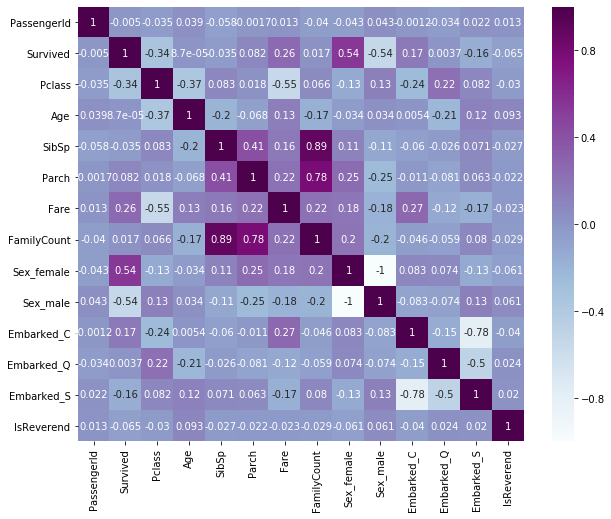

In [207]:
plt.figure(figsize = (10,8))
sns.heatmap(titanic_df.corr(), cmap ='BuPu', annot = True)

Some inferences from the heatmap above:

1) The class of the ticket is inveresely proportional to the fare of the ticket. 

    eg. class 3 tickets cost the least, class 1 tickets cost more

2) Being female was positively correlated to survival

3) Being male was negatively correlated to survival




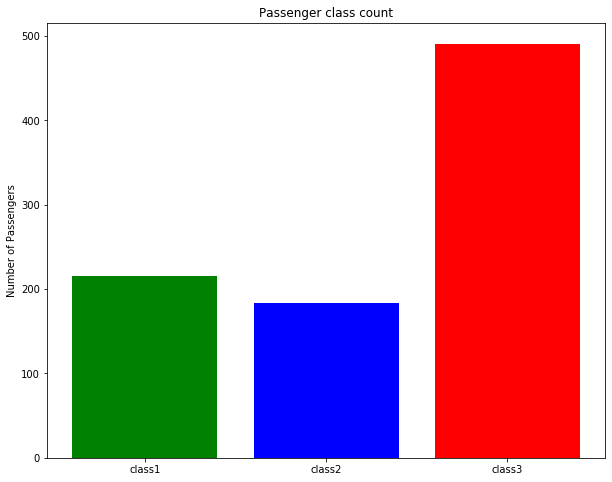

In [348]:
#Distribution of PClass
plt.figure(figsize =(10,8))
plt.bar(x = ('class1', 'class2','class3'), height = (counts_class1, counts_class2, counts_class3), color = ('g', 'b', 'r'));
plt.ylabel('Number of Passengers')
plt.title('Passenger class count');

In [ ]:
# Distribution of all plots

In [245]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
FamilyCount    891 non-null int64
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
IsReverend     891 non-null int64
dtypes: float64(2), int64(7), object(3), uint8(5)
memory usage: 88.0+ KB


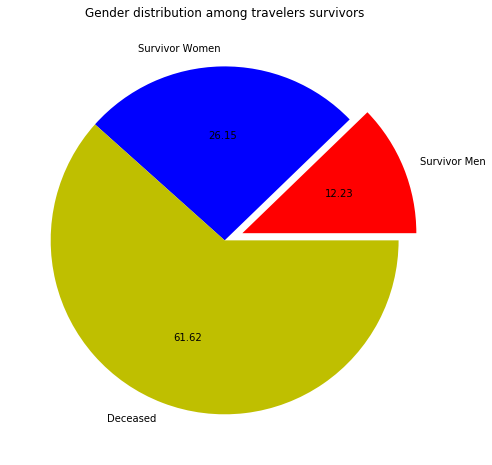

In [345]:
#Survivors by Gender
deceased = (891 - (survived_men + survived_women))
total = 891
plt.figure(figsize= (10,8))
plt.pie(x = [(survived_men/total),(survived_women/total), (deceased/total)],
       labels = ['Survivor Men', 'Survivor Women', 'Deceased'],
       autopct = '%.2f',
       colors= ['r','b','y'],
       explode= [0.11,0,0] ); 
plt.title('Gender distribution among travelers survivors');

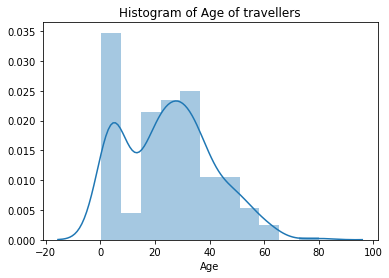

In [343]:
#Age distribution of survivors
sns.distplot(titanic_df[titanic_df['Survived'] == 1]['Age'])
plt.title('Histogram of Age of travellers');

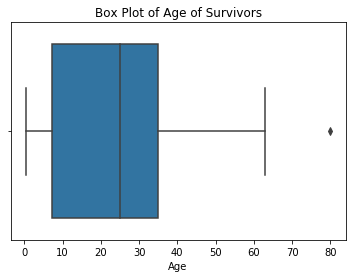

In [342]:
#Box plot of age distribution
sns.boxplot(titanic_df[titanic_df['Survived'] == 1]['Age'])
plt.title('Box Plot of Age of Survivors');

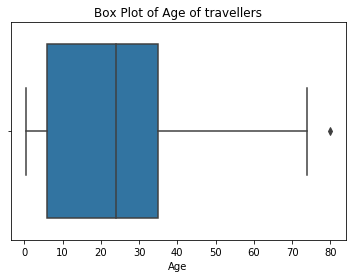

In [341]:
#Box plot of age of all travellers
sns.boxplot(titanic_df['Age'])
plt.title('Box Plot of Age of travellers');

An interesting insight from the above boxplot is that though there were people aged more than 65 on the ship. None of them survived

In [311]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,1,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,1,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,1,0,0,1,0


In [327]:
#Embarking Docs
test_df = pd.read_csv('train.csv')
loc_counts = test_df['Embarked'].value_counts()
S = loc_counts.values[0]
C = loc_counts.values[1]
Q = loc_counts.values[2]

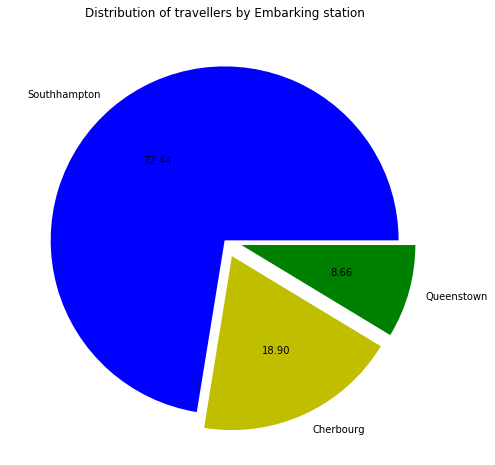

In [340]:
#travellers by Embarking station
plt.figure(figsize= (10,8))
plt.pie(x = [S,C,Q],
       labels = ['Southhampton', 'Cherbourg', 'Queenstown'],
       autopct = '%.2f',
       colors= ['b','y','g'],
       explode= [0,0.1,0.1] ); 
plt.title('Distribution of travellers by Embarking station');

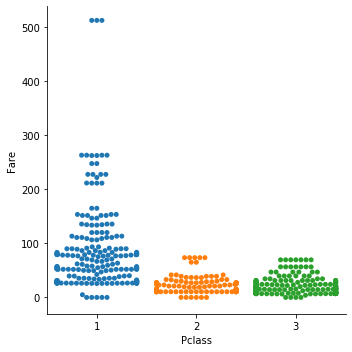

In [377]:
#Cost distribution of various classes
sns.catplot(x='Pclass', y='Fare', kind="swarm", data=titanic_df)

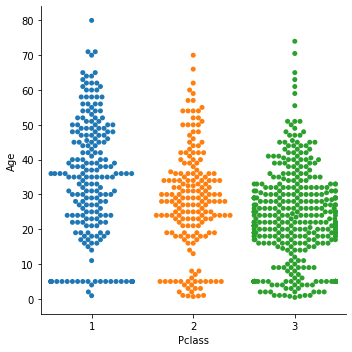

In [373]:
#Families in various classes
sns.catplot(x='Pclass', y='Age', kind="swarm", data=titanic_df)

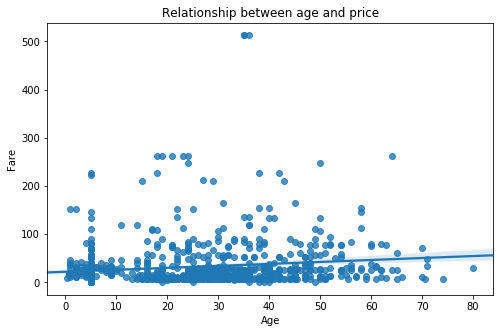

In [383]:
plt.figure(figsize = (8,5))
sns.regplot(data = titanic_df, x ='Age', y = 'Fare' );
plt.title("Relationship between age and price");